<a href="https://colab.research.google.com/github/Renuka-98/Git-test/blob/master/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import the libraries

All necessary libraries are imported

In [4]:
from google.colab import drive
#import the drive contents

In [5]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


The Drive is mounted to our project

In [8]:
train=pd.read_csv('gdrive/My Drive/Final Assignment-1/train.csv')
#reading of dataset train

Description about Dataset i.e. train and test

PassengerId-The Id of a unique passenger
Survived-The count of passenger survived out 891 passengers
Pclass-The class of each passenger
Name-Name of aboarded passengers
Sex-The gender of each passenger
Age-The age of the passengers in ship
SibSp-The count of passengers with siblings or Spouses
Parch-The count of Passengers with Parent and their children
Ticket-The ticket number of the each aboarded passengers
Fare-The total Fare of the passengers
Cabin-The count of Passengers having Cabin and thier Cabin number
Embarked-The ports for which the passengers are aboarded i.e
3 PORTS-Southampton (S),Cherbourg(C),Queenstown(Q)


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.describe(include='all')
#description of dataset the measures of various feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [11]:
test=pd.read_csv('gdrive/My Drive/Final Assignment-1/test.csv')
#reading test dataset

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.info

<bound method DataFrame.info of      PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]>

In [14]:
gd=pd.read_csv('gdrive/My Drive/Final Assignment-1/gender_submission.csv')

The null values are calculated in train dataset features

In [15]:
df=pd.isnull(train).sum()

In [16]:
df


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Data visualization




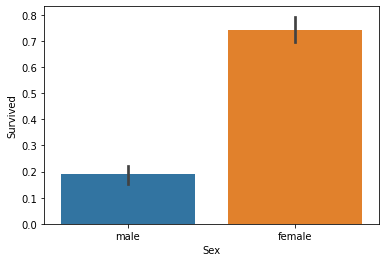

In [17]:
#plotting the features against the survived rate
sns.barplot(x="Sex", y="Survived", data=train)


In [18]:
print("Number of Males Survived:",train['Survived'][train['Sex']=='male'].value_counts(normalize='True')[1]*100)
print("Number of Females Survived:",train['Survived'][train['Sex']=='female'].value_counts(normalize='True')[1]*100)


Number of Males Survived: 18.890814558058924
Number of Females Survived: 74.20382165605095


From the above graph we predicted that females are more likely to survive compared to males

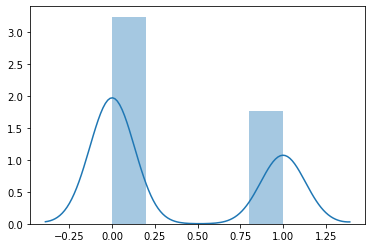

In [19]:
df1=pd.DataFrame(train['Sex']=='female')
ax=sns.distplot(df1)

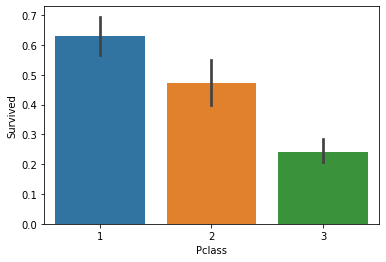

In [20]:
sns.barplot(x='Pclass',y='Survived',data=train)
#plotting the Pclass against survived number

In [21]:
print("People with economic class Pclass=1 who survived",train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)
print("People with economic class Pclass=2 who survived",train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)
print("People with economic class Pclass=3 who survived",train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)


People with economic class Pclass=1 who survived 62.96296296296296
People with economic class Pclass=2 who survived 47.28260869565217
People with economic class Pclass=3 who survived 24.236252545824847


From this plot we predicted that people with top  passenger classs survived more than other passenger class people.

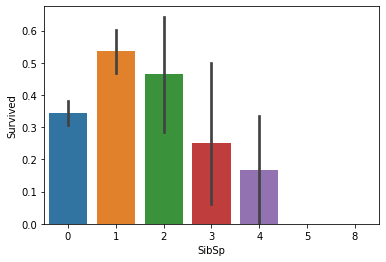

In [22]:
#plotiing the people with sibling and spouses
sns.barplot(x="SibSp", y="Survived", data=train)

The barplot shows that in  a given data  set the people having one sibling or spouse are surviving than people without any sibling or spouse

In [23]:
print("Percentage of Sibling/Spouse = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)
print("Percentage of Sibling/Spouse = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Sibling/Spouse = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Sibling/Spouse = 3 who survived:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of Sibling/Spouse = 4 who survived:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)



Percentage of Sibling/Spouse = 0 who survived: 34.53947368421053
Percentage of Sibling/Spouse = 1 who survived: 53.588516746411486
Percentage of Sibling/Spouse = 2 who survived: 46.42857142857143
Percentage of Sibling/Spouse = 3 who survived: 25.0
Percentage of Sibling/Spouse = 4 who survived: 16.666666666666664


Here Ages of people are distributed among different agegroups and here categories are made to define the particular agegroup people

In [24]:
train['Age']=train['Age'].fillna(0)
test['Age']=test['Age'].fillna(0)
bin_labels=['Baby','Child','Teenager','Young Adult','Adult','Senior Citizen']
bins=[5,12,18,25,35,60,np.inf]
train['Agegroup']=pd.cut(train['Age'],bins,labels=bin_labels)
test['Agegroup']=pd.cut(test['Age'],bins,labels=bin_labels)
#the Age is varing so we created Agegroup for dividing the passengers into a group for easy plotting


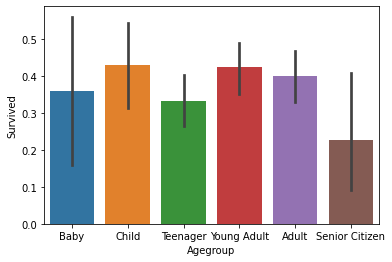

In [25]:
sns.barplot(x='Agegroup',y='Survived',data=train)

The barplot predicted that child and young adults survived more than any other agegroup people.

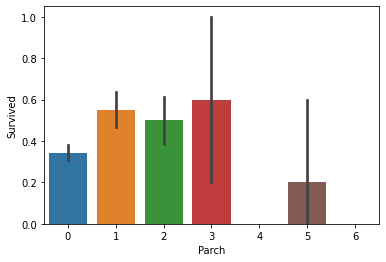

In [26]:
sns.barplot(x='Parch',y='Survived',data=train)

The prediction here was made that people with exact three parent or child are more likely to survive than people who are alone.

In [27]:
print("Number of Parent/child =0 who survived :",train["Survived"][train['Parch']==0].value_counts(normalize=True)[1]*100)
print("Number of Parent/child =1 who survived :",train["Survived"][train['Parch']==1].value_counts(normalize=True)[1]*100)
print("Number of Parent/child =2 who survived :",train["Survived"][train['Parch']==2].value_counts(normalize=True)[1]*100)
print("Number of Parent/child =3 who survived :",train["Survived"][train['Parch']==3].value_counts(normalize=True)[1]*100)


Number of Parent/child =0 who survived : 34.365781710914455
Number of Parent/child =1 who survived : 55.08474576271186
Number of Parent/child =2 who survived : 50.0
Number of Parent/child =3 who survived : 60.0


The people aboarded for three ports which were southampton,cherbourg and quuenstown

In [28]:
print("Number of people embarked in southampton  S:")
southampton=train[train['Embarked']=='S'].shape[0]
print(southampton)
#calculating the people aboarded for southampton

Number of people embarked in southampton  S:
644


In [29]:
print("Number of people embarked in cherbourg C")
cherbourg=train[train['Embarked']=='C'].shape[0]
print(cherbourg)
print("Number of people embarked in queenstown Q")
queenstown=train[train['Embarked']=='Q'].shape[0]
print(queenstown)
#calculating the number of peolple aboarded for cherbourg and queenstown

Number of people embarked in cherbourg C
168
Number of people embarked in queenstown Q
77


From this we undertsand that the people aboarded for southampton were more.There are some missing values in the Embarked feature for southampton port.So they are filled later

In [30]:
train=train.fillna({"Embarked":'S'})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Teenager
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


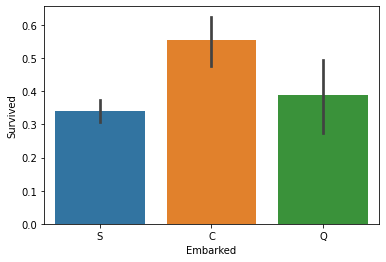

In [31]:
sns.barplot(x="Embarked",y='Survived',data=train)

The prediction we got was people going for cherbourg survived more than any other people

In [32]:
train['Cabin_count']=(train['Cabin'].notna().astype('int'))
test['Cabin_count']=(test['Cabin'].notna().astype('int'))
print("Number of people survived with Cabin_count=0",train['Survived'][train['Cabin_count']==0].value_counts(normalize=True)[1]*100)
print("Number of people survived with Cabin_count=1",train['Survived'][train['Cabin_count']==1].value_counts(normalize=True)[1]*100)

#Cabin is categorised with cabin and peolpe without cabin

Number of people survived with Cabin_count=0 29.985443959243085
Number of people survived with Cabin_count=1 66.66666666666666


The values for people with different cabin were calculated and people with were surviving more than people without cabin

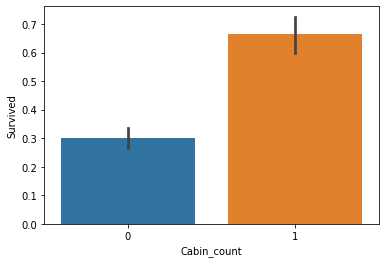

In [33]:
sns.barplot(x="Cabin_count",y="Survived",data=train)


In [34]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup,Cabin_count
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,320,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,6,NaN
top,NaN,NaN,"Keeping, Mr. Edwin",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,94,NaN
mean,1100.500000,2.265550,NaN,NaN,24.044258,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.599608,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


DATA CLEANING

The cabin values were not present for some variables so it was removed.

In [35]:
train=train.drop(['Cabin'],axis=1)
#Removing the Cabin feature as not requuired for prediction

In [36]:
test=test.drop(['Cabin'],axis=1)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agegroup,Cabin_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Teenager,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Young Adult,0


In [38]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agegroup,Cabin_count
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Young Adult,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Adult,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Senior Citizen,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Young Adult,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Teenager,0


The Name feature don't play any major role for prediction of survival,it was dropped

In [39]:
train=train.drop(['Name'],axis=1)
#droping NAME as not required

In [40]:
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agegroup,Cabin_count
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Teenager,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,Adult,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Young Adult,0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,Young Adult,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,Young Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S,Young Adult,0
887,888,1,1,female,19.0,0,0,112053,30.0000,S,Teenager,1
888,889,0,3,female,0.0,1,2,W./C. 6607,23.4500,S,NaN,0
889,890,1,1,male,26.0,0,0,111369,30.0000,C,Young Adult,1


In [41]:
test=test.drop(['Name'],axis=1)

In [42]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agegroup,Cabin_count
0,892,3,male,34.5,0,0,330911,7.8292,Q,Young Adult,0
1,893,3,female,47.0,1,0,363272,7.0000,S,Adult,0
2,894,2,male,62.0,0,0,240276,9.6875,Q,Senior Citizen,0
3,895,3,male,27.0,0,0,315154,8.6625,S,Young Adult,0
4,896,3,female,22.0,1,1,3101298,12.2875,S,Teenager,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0.0,0,0,A.5. 3236,8.0500,S,NaN,0
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C,Adult,1
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,Adult,0
416,1308,3,male,0.0,0,0,359309,8.0500,S,NaN,0


The Ticket feature was not giving enough info for determining survival rate.

In [43]:
train=train.drop(['Ticket'],axis=1)
#Droping the Ticket Feature which unecessary 

In [44]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,Cabin_count
0,1,0,3,male,22.0,1,0,7.2500,S,Teenager,0
1,2,1,1,female,38.0,1,0,71.2833,C,Adult,1
2,3,1,3,female,26.0,0,0,7.9250,S,Young Adult,0
3,4,1,1,female,35.0,1,0,53.1000,S,Young Adult,1
4,5,0,3,male,35.0,0,0,8.0500,S,Young Adult,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Young Adult,0
887,888,1,1,female,19.0,0,0,30.0000,S,Teenager,1
888,889,0,3,female,0.0,1,2,23.4500,S,NaN,0
889,890,1,1,male,26.0,0,0,30.0000,C,Young Adult,1


In [45]:
test=test.drop(['Ticket'],axis=1)

In [46]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,Cabin_count
0,892,3,male,34.5,0,0,7.8292,Q,Young Adult,0
1,893,3,female,47.0,1,0,7.0000,S,Adult,0
2,894,2,male,62.0,0,0,9.6875,Q,Senior Citizen,0
3,895,3,male,27.0,0,0,8.6625,S,Young Adult,0
4,896,3,female,22.0,1,1,12.2875,S,Teenager,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0.0,0,0,8.0500,S,NaN,0
414,1306,1,female,39.0,0,0,108.9000,C,Adult,1
415,1307,3,male,38.5,0,0,7.2500,S,Adult,0
416,1308,3,male,0.0,0,0,8.0500,S,NaN,0


The passenger id was just for calculating total passengers and it was to be determined in target class so it was removed from training dataset

In [47]:
train=train.drop(['PassengerId'],axis=1)

#the passengerid is also not helpful for prediction

In [48]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup,Cabin_count
0,0,3,male,22.0,1,0,7.2500,S,Teenager,0
1,1,1,female,38.0,1,0,71.2833,C,Adult,1
2,1,3,female,26.0,0,0,7.9250,S,Young Adult,0
3,1,1,female,35.0,1,0,53.1000,S,Young Adult,1
4,0,3,male,35.0,0,0,8.0500,S,Young Adult,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Young Adult,0
887,1,1,female,19.0,0,0,30.0000,S,Teenager,1
888,0,3,female,0.0,1,2,23.4500,S,NaN,0
889,1,1,male,26.0,0,0,30.0000,C,Young Adult,1


In [49]:
train=train.drop(['Cabin_count'],axis=1)

In [50]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,0,3,male,22.0,1,0,7.2500,S,Teenager
1,1,1,female,38.0,1,0,71.2833,C,Adult
2,1,3,female,26.0,0,0,7.9250,S,Young Adult
3,1,1,female,35.0,1,0,53.1000,S,Young Adult
4,0,3,male,35.0,0,0,8.0500,S,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Young Adult
887,1,1,female,19.0,0,0,30.0000,S,Teenager
888,0,3,female,0.0,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,Young Adult


In [51]:
test=test.drop(['Cabin_count'],axis=1)

In [52]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,892,3,male,34.5,0,0,7.8292,Q,Young Adult
1,893,3,female,47.0,1,0,7.0000,S,Adult
2,894,2,male,62.0,0,0,9.6875,Q,Senior Citizen
3,895,3,male,27.0,0,0,8.6625,S,Young Adult
4,896,3,female,22.0,1,1,12.2875,S,Teenager
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0.0,0,0,8.0500,S,NaN
414,1306,1,female,39.0,0,0,108.9000,C,Adult
415,1307,3,male,38.5,0,0,7.2500,S,Adult
416,1308,3,male,0.0,0,0,8.0500,S,NaN


The features were categorised to normalize our dataset for prediction

Data Normalization

In [53]:
ports = {"S": 0, "C": 1, "Q": 2}
data1=[train,test]

for df3 in data1:
  df3['Embarked']=df3['Embarked'].map(ports)

In [54]:
data1=[train,test]

for df4 in data1:
  df4['Fare']=df4['Fare'].fillna(0)
  df4['Fare']=df4['Fare'].astype('int')

In [55]:
gen={"male":1, "female":0}
data1=[train,test]

for df5 in data1:
  df5['Sex']=df5['Sex'].map(gen)


In [56]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,0,3,1,22.0,1,0,7,0,Teenager
1,1,1,0,38.0,1,0,71,1,Adult
2,1,3,0,26.0,0,0,7,0,Young Adult
3,1,1,0,35.0,1,0,53,0,Young Adult
4,0,3,1,35.0,0,0,8,0,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13,0,Young Adult
887,1,1,0,19.0,0,0,30,0,Teenager
888,0,3,0,0.0,1,2,23,0,NaN
889,1,1,1,26.0,0,0,30,1,Young Adult


The Age feature is divided into classes for grouping our values.

In [57]:
data1=[train,test]

for df6 in data1:
  df6['Age']=df6['Age'].astype(int)
  df6.loc[df6['Age']<=12 ,'Age']=0
  df6.loc[(df6['Age']>12) & (df6['Age']<=19),'Age']=1
  df6.loc[(df6['Age']>19) & (df6['Age']<=26),'Age']=2
  df6.loc[(df6['Age']>26) & (df6['Age']<=40),'Age']=3
  df6.loc[(df6['Age']>40) & (df6['Age']<=58),'Age']=4
  df6.loc[(df6['Age']>58) & (df6['Age']<=68),'Age']=5
  df6.loc[(df6['Age']>68) & (df6['Age']<=80),'Age']=6
  df6.loc[df6['Age']>80,'Age']=7
#The Age is categorised for different Agegroup into a single number to normalize the dataset
  

In [58]:
train['Age'].value_counts()

3    247
0    246
2    155
4    120
1     95
5     21
6      7
Name: Age, dtype: int64

In [59]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Agegroup
0,0,3,1,2,1,0,7,0,Teenager
1,1,1,0,3,1,0,71,1,Adult
2,1,3,0,2,0,0,7,0,Young Adult
3,1,1,0,3,1,0,53,0,Young Adult
4,0,3,1,3,0,0,8,0,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,13,0,Young Adult
887,1,1,0,1,0,0,30,0,Teenager
888,0,3,0,0,1,2,23,0,NaN
889,1,1,1,2,0,0,30,1,Young Adult


In [60]:
train=train.drop(['Agegroup'],axis=1)
  
#The Agegroup is now not required only used for visualization above

In [61]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,7,0
1,1,1,0,3,1,0,71,1
2,1,3,0,2,0,0,7,0
3,1,1,0,3,1,0,53,0
4,0,3,1,3,0,0,8,0
...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,13,0
887,1,1,0,1,0,0,30,0
888,0,3,0,0,1,2,23,0
889,1,1,1,2,0,0,30,1


In [62]:
test=test.drop(['Agegroup'],axis=1)

In [63]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,3,0,0,7,2
1,893,3,0,4,1,0,7,0
2,894,2,1,5,0,0,9,2
3,895,3,1,3,0,0,8,0
4,896,3,0,2,1,1,12,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,0,0,0,8,0
414,1306,1,0,3,0,0,108,1
415,1307,3,1,3,0,0,7,0
416,1308,3,1,0,0,0,8,0


The Fare feature is divided for considering all rates of fare.

In [64]:
data1=[train,test]
for df7 in data1:
  df7.loc[df7['Fare']<=7,'Fare']=0
  df7.loc[(df7['Fare']>7) & (df7['Fare']<=20),'Fare']=1
  df7.loc[(df7['Fare']>20) & (df7['Fare']<=40),'Fare']=2
  df7.loc[(df7['Fare']>40) & (df7['Fare']<=80),'Fare']=3
  df7.loc[(df7['Fare']>80) & (df7['Fare']<=120),'Fare']=4
  df7.loc[(df7['Fare']>120) & (df7['Fare']<=150),'Fare']=5
  df7.loc[(df7['Fare']>150) & (df7['Fare']<=200),'Fare']=6
  df7.loc[(df7['Fare']>200) & (df7['Fare']<=250),'Fare']=7
  df7.loc[df7['Fare']>250,'Fare']=8

#The Fare is also varing so it is categorised for normalization 
  

In [65]:
train['Fare'].value_counts()

1    283
0    241
2    192
3    101
4     36
7     11
8      9
6      9
5      9
Name: Fare, dtype: int64

In [66]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,2,1,0,0,0
1,1,1,0,3,1,0,3,1
2,1,3,0,2,0,0,0,0
3,1,1,0,3,1,0,3,0
4,0,3,1,3,0,0,1,0
...,...,...,...,...,...,...,...,...
886,0,2,1,3,0,0,1,0
887,1,1,0,1,0,0,2,0
888,0,3,0,0,1,2,2,0
889,1,1,1,2,0,0,2,1


Data splitting for prediction

In [67]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

#The survived passengers of test dataset are to be predicted by applying the GradientDescentBooster algorithm 

The model is fitted to get accuracy of working of our model into the algorithm.

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
Y_pred = gb.predict(X_test)
acc_gb = round(gb.score(X_train,Y_train) * 100, 2)
print(acc_gb)
#The algorithm is applied on the train dataset to and accuracy is determined from it



86.31


The prediction  from this model is determined

In [69]:
#The accuracy was calculated as 86.31 for our model
data2=pd.DataFrame(Y_pred)
#The final prediction are made from test dataset

In [70]:
data2

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


The test dataset's Survived number of people are to be predicted so we will add the survived feature and on the basis of model we will predict the other features contribution in survival

In [71]:
test['Survived']=data2[0]
#The survived feature is added in test dataset i.e the target dataset so the prediction of other features can be done

In [72]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,3,0,0,0,2,0
1,893,3,0,4,1,0,0,0,0
2,894,2,1,5,0,0,1,2,0
3,895,3,1,3,0,0,1,0,0
4,896,3,0,2,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,0,0,0,1,0,0
414,1306,1,0,3,0,0,4,1,1
415,1307,3,1,3,0,0,0,0,0
416,1308,3,1,0,0,0,1,0,0


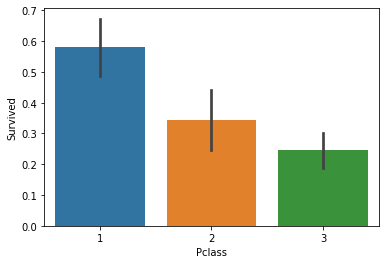

In [74]:
#visualization of Pclass against survived feature in test dataset
sns.barplot(test['Pclass'],test['Survived'])

The higher passenger class people are majority to survive the disaster

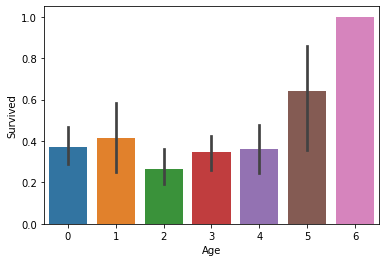

In [75]:
#plotting of Age category against Survived feature 
sns.barplot(test['Age'],test['Survived'])

The Age we categorised earlier and after implementing the model it was predicted that age category value having 5 are people between age 58 to 68 and above are surviving more than other categories

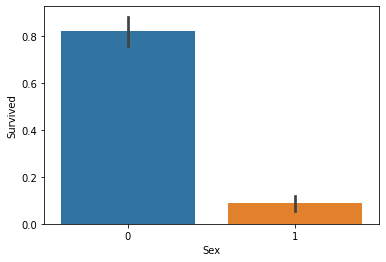

In [76]:
#plotting of sex categorised feature against Survived feature
sns.barplot(test['Sex'],test['Survived'])

The plot shows that the sex category =0 (i.e 'Females) survived more than males .

Conclusion :-

The conclusion made from this model is :
The features which made contribution for surviving rate of passengers are
Age
Pclass
Sex
The Sibsp and Parch
Thus we can conclude that after analysing these factors exact number of survived passengers can be determined for test dataset having data of 418 passengers.






